In [1]:
## udf
import temporal_functions


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
from figurefirst import FigureLayout,mpl_functions

import statsmodels.api as sm
import statsmodels.formula.api as smf

import multiprocessing
from astropy import stats

from scipy import stats

from numpy import (isscalar, r_, log, around, unique, asarray, zeros,
                   arange, sort, amin, amax, atleast_1d, sqrt, array,
                   compress, pi, exp, ravel, count_nonzero, sin, cos,
                   arctan2, hypot)


from scipy import optimize
from scipy import special

import figurefirst as fifi

In [20]:
folder_path='/home/gadfly/DataAnalysis/data/LagAnalysisPaper/maskedJaleesa/'

### Averaging for 10-second Lag

In [21]:
# df1=pd.read_hdf(folder_path+'10.20.20_maskedgpsdata.hdf')
df2=pd.read_hdf(folder_path+'7.7.21_maskedgpsdata.hdf')
# df3=pd.read_hdf(folder_path+'9.26.21_maskedgpsdata.hdf')
# df4=pd.read_hdf(folder_path+'10.29.21_maskedgpsdata.hdf')
# df5=pd.read_hdf(folder_path+'10.30.21_maskedgpsdata.hdf')
# df6=pd.read_hdf(folder_path+'1.8.22_maskedgpsdata.hdf')
# df7=pd.read_hdf(folder_path+'1.11.22_maskedgpsdata.hdf')
# df8=pd.read_hdf(folder_path+'1.15.22_maskedgpsdata.hdf')
# df9=pd.read_hdf(folder_path+'4.30.22_maskedgpsdata.hdf')
# df10=pd.read_hdf(folder_path+'5.1.22_maskedgpsdata.hdf')
# df11=pd.read_hdf(folder_path+'5.2.22_maskedgpsdata.hdf')
# df12=pd.read_hdf(folder_path+'6.1.22_maskedgpsdata.hdf')
# df13=pd.read_hdf(folder_path+'6.3.22_maskedgpsdata.hdf')
# df14=pd.read_hdf(folder_path+'6.7.22_maskedgpsdata.hdf')
# df15=pd.read_hdf(folder_path+'6.8.22_maskedgpsdata.hdf')
# df16=pd.read_hdf(folder_path+'6.22.22_maskedgpsdata.hdf')

In [4]:
# dfs = [
#     pd.read_hdf(folder_path+'10.20.20_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'7.7.21_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'9.26.21_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'10.29.21_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'10.30.21_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'1.8.22_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'1.11.22_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'1.15.22_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'4.30.22_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'5.1.22_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'5.2.22_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'6.1.22_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'6.3.22_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'6.7.22_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'6.8.22_maskedgpsdata.hdf'),
#     pd.read_hdf(folder_path+'6.22.22_maskedgpsdata.hdf')
# ]

# # List of corresponding filenames for saving
# filenames = [
#     '10.20.20_temporal.hdf',
#     '7.7.21_temporal.hdf',
#     '9.26.21_temporal.hdf',
#     '10.29.21_temporal.hdf',
#     '10.30.21_temporal.hdf',
#     '1.8.22_temporal.hdf',
#     '1.11.22_temporal.hdf',
#     '1.15.22_temporal.hdf',
#     '4.30.22_temporal.hdf',
#     '5.1.22_temporal.hdf',
#     '5.2.22_temporal.hdf',
#     '6.1.22_temporal.hdf',
#     '6.3.22_temporal.hdf',
#     '6.7.22_temporal.hdf',
#     '6.8.22_temporal.hdf',
#     '6.22.22_temporal.hdf'
# ]

In [5]:
# loglags = np.arange(100,6100,100)

# for idx, df in enumerate(dfs):
#     print(filenames[idx])
#     totalrows = np.arange(0, int(len(df)/10000))
#     listoflists_avgd = np.empty((len(totalrows), 0)).tolist()
#     listoflists_avgs = np.empty((len(totalrows), 0)).tolist()
#     listoflists_stdd = np.empty((len(totalrows), 0)).tolist()
#     listoflists_stds = np.empty((len(totalrows), 0)).tolist()

#     for j in totalrows:
#         listoflists_avgd[j], listoflists_avgs[j], listoflists_stdd[j], listoflists_stds[j] = temporal_functions.new_temporal_analysis(df.D_2, df.S2_2, lagarray=loglags, method='forward')

#     # Convert to df
#     df_avgd = pd.DataFrame(listoflists_avgd, columns=loglags)
#     df_avgs = pd.DataFrame(listoflists_avgs, columns=loglags)
#     df_stdd = pd.DataFrame(listoflists_stdd, columns=loglags)
#     df_stds = pd.DataFrame(listoflists_stds, columns=loglags)

#     frames = []
#     for k in df_avgd.index:
#         xtra = {
#             'speed_std': df_stds.iloc[k,:], 
#             'direction_std': df_stdd.iloc[k,:],
#             'speed_avg': df_avgs.iloc[k,:], 
#             'direction_avg': df_avgd.iloc[k,:],
#         }
#         frames.append(pd.DataFrame(xtra))

#     test_ddf = pd.concat(frames)

#     test_ddf.reset_index(inplace=True)
#     test_ddf.rename(columns={'index':'time'}, inplace=True)

#     test_ddf[['environment']] = .001
#     test_ddf[['group']] = 1
#     test_ddf.direction_std = test_ddf.direction_std*180/np.pi
#     test_ddf.time = test_ddf.time*.1 

#     # Save with the corresponding filename
#     test_ddf.to_hdf(folder_path +'LowRes/'+ filenames[idx], key='data',mode='w')

### Prepping the temporals

In [6]:
## 30 second 
# folder_path='/home/gadfly/DataAnalysis/data/LagAnalysisPaper/'
# t1=pd.read_hdf(folder_path+'dfs_for_temporalregression/10.20.20_temporal.hdf')
# t2=pd.read_hdf(folder_path+'dfs_for_temporalregression/7.7.21_temporal.hdf')
# t3=pd.read_hdf(folder_path+'dfs_for_temporalregression/9.26.21_temporal.hdf')
# t4=pd.read_hdf(folder_path+'dfs_for_temporalregression/10.29.21_temporal.hdf')
# t5=pd.read_hdf(folder_path+'dfs_for_temporalregression/10.30.21_temporal.hdf')
# t6=pd.read_hdf(folder_path+'dfs_for_temporalregression/1.8.22_temporal.hdf')
# t7=pd.read_hdf(folder_path+'dfs_for_temporalregression/1.11.22_temporal.hdf')
# t8=pd.read_hdf(folder_path+'dfs_for_temporalregression/1.15.22_temporal.hdf')
# t9=pd.read_hdf(folder_path+'dfs_for_temporalregression/4.30.22_temporal.hdf')
# t10=pd.read_hdf(folder_path+'dfs_for_temporalregression/5.1.22_temporal.hdf')
# t11=pd.read_hdf(folder_path+'dfs_for_temporalregression/5.2.22_temporal.hdf')
# t12=pd.read_hdf(folder_path+'dfs_for_temporalregression/6.1.22_temporal.hdf')
# t13=pd.read_hdf(folder_path+'dfs_for_temporalregression/6.3.22_temporal.hdf')
# t14=pd.read_hdf(folder_path+'dfs_for_temporalregression/6.7.22_temporal.hdf')
# t15=pd.read_hdf(folder_path+'dfs_for_temporalregression/6.8.22_temporal.hdf')
# t16=pd.read_hdf(folder_path+'dfs_for_temporalregression/6.22.22_temporal.hdf')

In [65]:
## 10 second
folder_path='/home/gadfly/DataAnalysis/data/LagAnalysisPaper/maskedJaleesa/LowRes/'
t1=pd.read_hdf(folder_path+'10.20.20_temporal.hdf')
t2=pd.read_hdf(folder_path+'7.7.21_temporal.hdf')
t3=pd.read_hdf(folder_path+'9.26.21_temporal.hdf')
t4=pd.read_hdf(folder_path+'10.29.21_temporal.hdf')
t5=pd.read_hdf(folder_path+'10.30.21_temporal.hdf')
t6=pd.read_hdf(folder_path+'1.8.22_temporal.hdf')
t7=pd.read_hdf(folder_path+'1.11.22_temporal.hdf')
t8=pd.read_hdf(folder_path+'1.15.22_temporal.hdf')
t9=pd.read_hdf(folder_path+'4.30.22_temporal.hdf')
t10=pd.read_hdf(folder_path+'5.1.22_temporal.hdf')
t11=pd.read_hdf(folder_path+'5.2.22_temporal.hdf')
t12=pd.read_hdf(folder_path+'6.1.22_temporal.hdf')
t13=pd.read_hdf(folder_path+'6.3.22_temporal.hdf')
t14=pd.read_hdf(folder_path+'6.7.22_temporal.hdf')
t15=pd.read_hdf(folder_path+'6.8.22_temporal.hdf')
t16=pd.read_hdf(folder_path+'6.22.22_temporal.hdf')

t1_1=pd.read_hdf(folder_path+'hws_temporal.hdf')
t1_2=pd.read_hdf(folder_path+'lws_temporal.hdf')
t_f=pd.read_hdf(folder_path+'forest_temporal.hdf')
t_desert=pd.read_hdf(folder_path+'desert_temporal.hdf')

In [77]:
# print('hws',np.mean(t1_1.direction_std))
# print('lws',np.mean(t1_2.direction_std))
# print('forest',np.mean(t_f.direction_std))
# print('desert',np.mean(t_desert.direction_std))

hws 8.176806221205494
lws 27.039636492930686
forest 44.945968868133285
desert 18.934092621712818


In [85]:
t1_1['turb_intensity']=t1_1['speed_std']/t1_1['speed_avg']
t1_2['turb_intensity']=t1_2['speed_std']/t1_2['speed_avg']
t_f['turb_intensity']=t_f['speed_std']/t_f['speed_avg']
t_desert['turb_intensity']=t_desert['speed_std']/t_desert['speed_avg']

print('hws',np.mean(t1_1.turb_intensity))
print('lws',np.mean(t1_2.turb_intensity))
print('desert',np.mean(t_desert.turb_intensity))
print('forest',np.mean(t_f.turb_intensity))

hws 0.13695991439742758
lws 0.36049355928092397
desert 0.26898192445812114
forest 0.542447812723691


In [113]:
# alltemp=[t1,t2,t4,t7,t8,t12,t13,t14,t15,t16] ## without urban

alltemp=[t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16] ## with urban

for i in range(len(alltemp)):
    alltemp[i]['turb_intensity']=alltemp[i]['speed_std']/alltemp[i]['speed_avg']
    
alltempconcat=pd.concat(alltemp)
alltempconcat=alltempconcat.reset_index(inplace=False)


In [114]:
desertchunks=pd.concat([t1,t7,t8,t12,t13])
forestchunks=pd.concat([t2,t4,t14,t15,t16])
urbanchunks=pd.concat([t3,t5,t6,t9,t10,t11])
desert=0,6,7,11,12
forest=1,3,13,14,15
urban=2,4,5,8,9,10

In [115]:
desertchunks=desertchunks.reset_index(drop=True)
forestchunks=forestchunks.reset_index(drop=True)
urbanchunks=urbanchunks.reset_index(drop=True)

### Plotting the Contour Map using Seaborn KDE

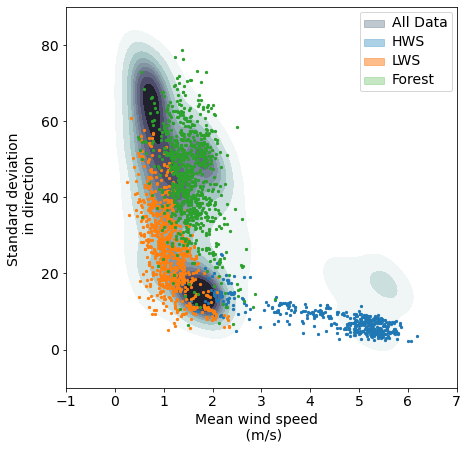

In [116]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.kdeplot(data=alltempconcat, x='speed_avg', y='direction_std', cmap='bone_r', shade=True, ax=ax, label='All Data')
# sns.kdeplot(data=forestchunks, x='speed_avg', y='direction_std', cmap='Greens', shade=True, ax=ax, alpha=1, label='Forest')
# sns.kdeplot(data=urbanchunks, x='speed_avg', y='direction_std', cmap='Purples', shade=True, ax=ax, alpha=0.7, thresh=0.05, label='Urban')  # Assuming 't1' is another dataset
# sns.kdeplot(data=t1, x='speed_avg', y='direction_std', cmap='Blues', shade=True, ax=ax, alpha=0.8, thresh=0.05, label='Our Data')  # Assuming 't1' is another dataset
ax.scatter(t1_1.speed_avg, t1_1.direction_std, cmap='Blues', s=5, label='HWS')
ax.scatter(t1_2.speed_avg, t1_2.direction_std, cmap='Oranges', s=5, label='LWS')
# ax.scatter(t2.speed_avg, t2.direction_std, cmap='g', s=5, label='Forest')
ax.scatter(t_f.speed_avg, t_f.direction_std, cmap='g', s=5, label='Forest')

ax.set_xlim(-1,7)
ax.set_ylim(-10,90)
ax.set_xlabel('Mean wind speed  \n (m/s)')
ax.set_ylabel('Standard deviation \n in direction')

# mpl_functions.adjust_spines(ax,['left','bottom'],
#                             spine_locations={'left': 1,'bottom': 1}, 
#                             smart_bounds=True,   
#                             xticks=[0,7],
#                             yticks=[0,80],
#                             linewidth=0.5)


# Custom legend patches
all_patch = mpatches.Patch(color=sns.color_palette("bone_r")[2], label='All Data', alpha=0.5)
hws_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label='HWS', alpha=0.7)
lws_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label='LWS', alpha=0.7)
forest_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label='Forest', alpha=0.5)
# urban_patch = mpatches.Patch(color=sns.color_palette("Purples")[2], label='Urban', alpha=0.7)

# Add patches to the legend
ax.legend(handles=[all_patch, hws_patch, lws_patch, forest_patch])
# ax.legend(handles=[desert_patch])


mpl_functions.set_fontsize(f, 14)
# f.savefig('../../Figure/LagAllwUrban2.jpeg', dpi=300, bbox_inches = "tight")

In [39]:
print('Desert',np.mean(t1.direction_std))
print('Forest',np.mean(t2.direction_std))

Desert 11.653955869832314
Forest 44.18842831945931


### Histogram Method

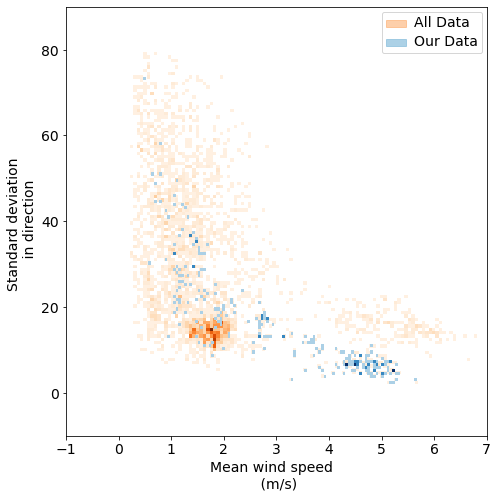

In [36]:

f, ax = plt.subplots(1, 1, figsize=(7, 7))

# Using histplot with kind='kde' to create heatmap-like visualizations
sns.histplot(data=alltempconcat, x='speed_avg', y='direction_std', cmap='Oranges', ax=ax, cbar=False, bins=100, label='All Data')
# sns.histplot(data=forestchunks, x='speed_avg', y='direction_std', cmap='Greens', ax=ax, cbar=True, label='Forest')
# sns.histplot(data=urbanchunks, x='speed_avg', y='direction_std', cmap='Purples', ax=ax, cbar=True, label='Urban')
sns.histplot(data=t1, x='speed_avg', y='direction_std', cmap='Blues', ax=ax, cbar=False, bins=100, label='Our Data')

ax.set_xlim(-1,7)
ax.set_ylim(-10,90)
ax.set_xlabel('Mean wind speed  \n (m/s)')
ax.set_ylabel('Standard deviation \n in direction')

# Custom legend patches
desert_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label='All Data', alpha=0.5)
# forest_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label='Forest', alpha=0.5)
# urban_patch = mpatches.Patch(color=sns.color_palette("Purples")[2], label='Urban', alpha=0.7)
t1_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label='Our Data', alpha=0.7)

# Add patches to the legend
# ax.legend(handles=[desert_patch, forest_patch, urban_patch, t1_patch])
ax.legend(handles=[desert_patch, t1_patch])
mpl_functions.set_fontsize(f, 14)
f.tight_layout(pad=1)

### Mean wind stat vs AIC selected stat 

In [46]:
dir='~/DataAnalysis/data/DesertWind/'
df = pd.read_hdf(dir+"20201020_172919_windy_b_data.hdf")

time = []
time.append(0)
dt=df.time_epoch.iloc[1]-df.time_epoch.iloc[0]
for j in range(1,len(df)):
    time.append(time[j-1]+dt)

df['time'] = time    


In [31]:
# df_forest = pd.read_hdf("../../Figure/methodfigure2/windgpsdata.hdf")
df_forest=pd.read_hdf('/home/gadfly/DataAnalysis/data/ForestWindData/202177_171430_windgps_data_an.hdf')
time = df_forest.time_epoch-df_forest.time_epoch[0]
df_forest['time']=time

In [52]:
query='time<=47839'
lws=df.query(query)
lws.reset_index(inplace=True)

In [53]:
query='time>=47840'
hws=df.query(query)
hws.reset_index(inplace=True)

In [61]:
df=hws.copy()
loglags=np.arange(100,6100,100) 
# lags from 0-10mins, 30 sec intervals -- excluding lag zero since there is no standard dev over a period of 0
totalrows=np.arange(0,int(len(df)/10000))
listoflists_avgd = np.empty((len(totalrows), 0)).tolist()
listoflists_avgs = np.empty((len(totalrows), 0)).tolist()
listoflists_stdd = np.empty((len(totalrows), 0)).tolist()
listoflists_stds = np.empty((len(totalrows), 0)).tolist()

for j in totalrows:
        listoflists_avgd[j], listoflists_avgs[j], listoflists_stdd[j], listoflists_stds[j] = temporal_functions.new_temporal_analysis(df.D, df.S2, lagarray=loglags, method='forward')

# Convert to df
df_avgd = pd.DataFrame(listoflists_avgd, columns=loglags)
df_avgs = pd.DataFrame(listoflists_avgs, columns=loglags)
df_stdd = pd.DataFrame(listoflists_stdd, columns=loglags)
df_stds = pd.DataFrame(listoflists_stds, columns=loglags)

test_ddf=pd.DataFrame(columns = ['speed_std', 'direction_std', 'speed_avg', 'direction_avg'])
i=0
frames = []  # list to hold individual DataFrames

for k in df_avgd.index:
    xtra = {
        'speed_std': df_stds.iloc[k,:], 
        'direction_std': df_stdd.iloc[k,:],
        'speed_avg': df_avgs.iloc[k,:], 
        'direction_avg': df_avgd.iloc[k,:],
    }
    frames.append(pd.DataFrame(xtra))

# Concatenate all the data frames in the 'frames' list
test_ddf = pd.concat(frames)

test_ddf.reset_index(inplace=True)
test_ddf.rename(columns={'index':'time'}, inplace=True)

test_ddf[['environment']]=.001 #based on environment
test_ddf[['group']]=1 #based on order of data collection
test_ddf.direction_std=test_ddf.direction_std*180/np.pi #make it degrees again
test_ddf.time=test_ddf.time*.1 #fix the time to be accurate 


In [62]:
folder_path='/home/gadfly/DataAnalysis/data/LagAnalysisPaper/maskedJaleesa/LowRes/'
test_ddf.to_hdf(str(folder_path)+'hws_temporal.hdf', key='data',mode='w')

In [138]:
df_windy_temporal=pd.read_hdf(folder_path+'windy_temporal.hdf')
df_notwindy_temporal=pd.read_hdf(folder_path+'notwindy_temporal.hdf')
df_forest_temporal=pd.read_hdf(folder_path+'forest_temporal.hdf')

df_windy_temporal['turb_intensity']=df_windy_temporal['speed_std']/df_windy_temporal['speed_avg']
df_notwindy_temporal['turb_intensity']=df_notwindy_temporal['speed_std']/df_notwindy_temporal['speed_avg']
df_forest_temporal['turb_intensity']=df_forest_temporal['speed_std']/df_forest_temporal['speed_avg']

In [139]:
print('HWS',np.mean(df_windy_temporal.direction_std))
print('LWS',np.mean(df_notwindy_temporal.direction_std))
print('Forest',np.mean(df_forest_temporal.direction_std))

HWS 19.403883482508572
LWS 18.506990690073383
Forest 19.25043166134188


In [140]:
print('HWS',np.mean(df_windy_temporal.turb_intensity))
print('LWS',np.mean(df_notwindy_temporal.turb_intensity))
print('Forest',np.mean(df_forest_temporal.turb_intensity))

HWS 0.2720368859722454
LWS 0.25759813619335786
Forest 0.26713574428323617


In [144]:
print('HWS',np.mean(df_windy_temporal.speed_avg))
print('LWS',np.mean(df_notwindy_temporal.speed_avg))
print('Forest',np.mean(df_forest_temporal.speed_avg))

HWS 160.2489259429966
LWS 160.1528946829234
Forest 158.41363845923922


In [ ]:
# c=['peru', 'mediumseagreen', 'rebeccapurple', 'mediumseagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'rebeccapurple', 'rebeccapurple']

# f, ax =plt.subplots(1,1, figsize=(5,5), layout='tight')

# for i in range(0,len(alltemp)):
#     ax.scatter(alltemp[i].speed_avg, np.abs(alltemp[i].direction_std),  s=4, color=c[i], alpha=.35, linewidth=None, rasterized=True)

# slope, intercept = np.polyfit(desertchunks.speed_avg, desertchunks.direction_std, 1)
# abline_values = [slope * i + intercept for i in desertchunks.speed_avg]
# ax.plot(desertchunks.speed_avg, abline_values, 'chocolate', linewidth=1)
# slope, intercept = np.polyfit(forestchunks.speed_avg, forestchunks.direction_std, 1)
# abline_values = [slope * i + intercept for i in forestchunks.speed_avg]
# ax.plot(forestchunks.speed_avg, abline_values, 'forestgreen', linewidth=1)  


# ax.set_xlabel('Mean wind speed  \n (m/s)')
# ax.set_ylabel('Standard deviation \n in direction')
# fifi.mpl_functions.set_fontsize(f, 14)

In [ ]:
# f, ax = plt.subplots(1, 1, figsize=(7, 7))
# sns.kdeplot(data=desertchunks, x='speed_avg', y='direction_std', cmap='Oranges', shade=True, ax=ax, alpha=0.8, thresh=0.05, label='Desert')
# sns.kdeplot(data=forestchunks, x='speed_avg', y='direction_std', cmap='Greens', shade=True, ax=ax, alpha=1, label='Forest')
# sns.kdeplot(data=urbanchunks, x='speed_avg', y='direction_std', cmap='Purples', shade=True, ax=ax, alpha=0.7, thresh=0.05, label='Urban')  # Assuming 't1' is another dataset
# sns.kdeplot(data=t1, x='speed_avg', y='direction_std', cmap='Blues', shade=True, ax=ax, alpha=0.7, thresh=0.05, label='Our Data')  # Assuming 't1' is another dataset
# ax.set_xlim(-1,7)
# ax.set_ylim(-10,80)
# ax.set_xlabel('Mean wind speed  \n (m/s)')
# ax.set_ylabel('Standard deviation \n in direction')

# # mpl_functions.adjust_spines(ax,['left','bottom'],
# #                             spine_locations={'left': 1,'bottom': 1}, 
# #                             smart_bounds=True,   
# #                             xticks=[0,7],
# #                             yticks=[0,80],
# #                             linewidth=0.5)


# # Custom legend patches
# desert_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label='Desert', alpha=0.5)
# forest_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label='Forest', alpha=0.5)
# urban_patch = mpatches.Patch(color=sns.color_palette("Purples")[2], label='Urban', alpha=0.7)
# t1_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label='Our Data', alpha=0.7)

# # Add patches to the legend
# ax.legend(handles=[desert_patch, forest_patch, urban_patch,t1_patch])


# mpl_functions.set_fontsize(f, 14)
# # f.savefig('../../Figure/LagAll.jpeg', dpi=300, bbox_inches = "tight")